Here we Generate a 1D linear input

np.linalg.lstsq helps us solve the linear equation

(21, 2) (2,)


/usr/local/lib/python3.10/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


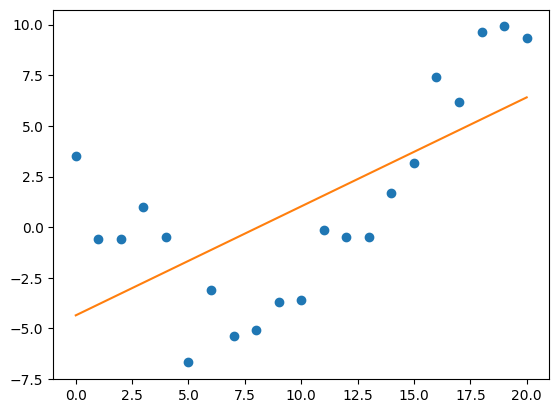

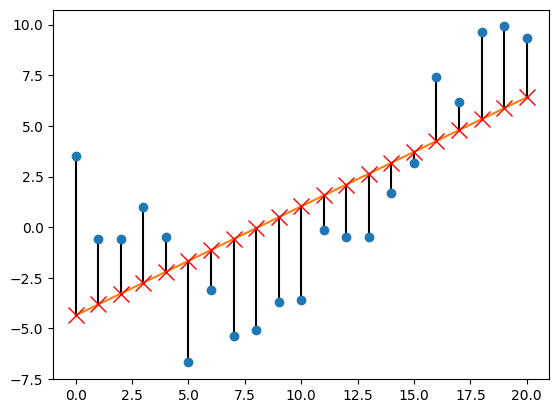

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
# random seed make random number predictable and make same number appear again
# https://stackoverflow.com/questions/21494489/
# How to generate a random sample for a 1d linear regression
np.random.seed(0)
N = 21
# creates a plot of evenly spaced numbers generally used for plotting
x = np.linspace(0.0, 20, N)
# reshape is used to convert and list of values into a matrix of desired length like
# X0 = x.reshape(7, 3)
# Here we are converting all the values into a 1d array
X0 = x.reshape(N,1)
# Here we join/combine 2 arrays of equal length into 1 array
X = np.c_[np.ones((N, 1)), X0]
w = np.array([-1.5, 1 / 9.0])
# Here we take y = -1.5x + 0.111.. x^2
y = w[0] * x + w[1] * np.square(x)
# Here we normalize the values of y with mean 0 and sd 1
y = y + np.random.normal(0, 1, N) * 2
# numpy.linalg.lsts is used to solve linear equations of under/over/well determined matrixes
w = np.linalg.lstsq(X, y, rcond=None)[0]
print(X.shape,w.shape)
y_estim = np.dot(X,w)

plt.plot(X[:, 1], y, "o")
plt.plot(X[:, 1], y_estim, "-")
pml.savefig("linregResidualsNoBars.pdf")
plt.show()

for x0, y0, y_hat in zip(X[:, 1], y, y_estim):
    plt.plot([x0, x0], [y0, y_hat], "k-")
plt.plot(X[:, 1], y, "o")
plt.plot(X[:, 1], y_estim, "-")
plt.plot(X[:, 1], y_estim, "x", color="r", markersize=12)
pml.savefig("linregResidualsBars.pdf")
plt.show()
